# 🔥 Data Loading with WandB Artifacts 🪄🐝

This notebook demonstrates the usage of a simple and easy-to use data loading API built on top of [Tensorflow Datasets](https://www.tensorflow.org/datasets) and [WandB Artifacts](https://docs.wandb.ai/guides/artifacts).

## Loading the Dataset

Now that the dataset is uploaded as an artifact with the builder logic, loading and ingesting the dataset is incredibly easy. To do this we would simply use the [`wandb_addons.dataset.load_dataset`](../dataset_loading) function.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from wandb_addons.dataset import load_dataset

2023-04-27 16:18:49.404646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Just pass in the artifact address of the dataset artifact, and we are all set. For detailed documentation of all parameters and option, refer to [this page](../dataset_loading).

**Note:** For loading and ingesting the dataset from a wandb artifact, its not compulsory to initialize a [run](https://docs.wandb.ai/guides/runs). However, loading inside the context of a run has added advantages of tracking [lineage](https://docs.wandb.ai/guides/app/pages/project-page#lineage-panel) of artifacts and ease of versioning.

In [2]:
datasets, dataset_builder_info = load_dataset(
    "geekyrakshit/monkey-dataset/wild_cat_species:v3", quiet=True
)

wandb: Downloading large artifact wild_cat_species:v3, 66.28MB. 6 files... 
wandb:   6 of 6 files downloaded.  
Done. 0:0:0.1
wandb: Building dataset for split: train...
2023-04-27 16:18:52.227012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Built dataset for split: train, num_shards: 1, num_examples: 2339
wandb: Building dataset for split: val...
wandb: Built dataset for split: val, num_shards: 1, num_examples: 50
wandb: Building dataset for split: test...
wandb: Built dataset for split: test, num_shards: 1, num_examples: 50


Now we that we have created the **TensorFlow datasets** corresponding to the splits along with the general info of the dataset, we can verify them.

In [3]:
class_names = dataset_builder_info.features["label"].names

2023-04-27 16:18:53.094040: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


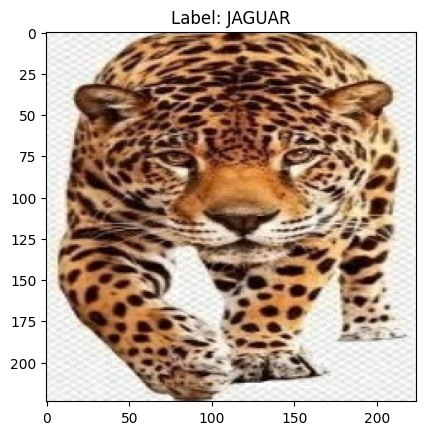

In [4]:
sample = next(iter(datasets["train"]))
plt.imshow(sample["image"].numpy())
label_name = class_names[sample["label"].numpy()]
plt.title(f"Label: {label_name}")
plt.show()

2023-04-27 16:18:53.744911: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


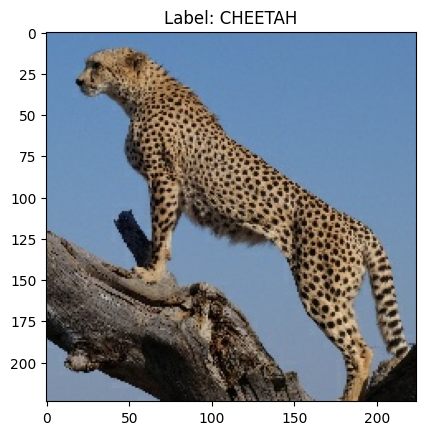

In [5]:
sample = next(iter(datasets["val"]))
plt.imshow(sample["image"].numpy())
label_name = class_names[sample["label"].numpy()]
plt.title(f"Label: {label_name}")
plt.show()

In [6]:
print("Train Dataset Cardinality:", tf.data.experimental.cardinality(datasets["train"]).numpy())
print("Validation Dataset Cardinality:", tf.data.experimental.cardinality(datasets["val"]).numpy())

Train Dataset Cardinality: 2339
Validation Dataset Cardinality: 50


Now that we have verified the dataset splits, we can use them to build high-performance input pipelines for our training workflows not onlt in TensorFlow, but also JAX and PyTorch. You can refer to the following docs regarding building input pipelines:

- [`tf.data`: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).
- [Better performance with the `tf.data` API](https://www.tensorflow.org/guide/data_performance).
- [TFDS for Jax and PyTorch](https://www.tensorflow.org/datasets/tfless_tfds)